# Anexo B


## Funtions

In [142]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
torch.manual_seed(55)
np.random.seed(55)

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 4)
        self.layer2 = nn.Linear(4, 3)
        self.layer3 = nn.Linear(3, 1)
        
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Tanh()
        self.activation3 = nn.Tanh()
        
    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.activation3(self.layer3(x))
        return x

# Normalize data
def normalize_data(y, normalize_to_minus_one=True):
    if normalize_to_minus_one:
        return 2 * (y - np.min(y)) / (np.max(y) - np.min(y)) - 1
    else:
        return (y - np.min(y)) / (np.max(y) - np.min(y))

# Generate synthetic data for a quadratic function
def generate_quadratic_data(x_range, num_points, noise=0.0, normalize_to_minus_one=True):
    x = np.linspace(*x_range, num_points)
    y = x**2 + noise * np.random.randn(num_points)
    y = normalize_data(y, normalize_to_minus_one)
    return x, y

# Generate synthetic data for a sine function
def generate_sine_data(x_range, num_points, noise=0.0, normalize_to_minus_one=True):
    x = np.linspace(*x_range, num_points)
    y = np.sin(x) + noise * np.random.randn(num_points)
    y = normalize_data(y, normalize_to_minus_one)
    return x, y

# Convert numpy arrays to torch tensors
def to_tensor(x, y):
    return torch.FloatTensor(x).unsqueeze(1), torch.FloatTensor(y).unsqueeze(1)

# Train the neural network
def train(model, criterion, optimizer, x_train, y_train, x_val, y_val, num_epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

        train_accuracy = calculate_accuracy(outputs, y_train)
        val_accuracy = calculate_accuracy(val_outputs, y_val)
        train_accuracies.append(train_accuracy.item())
        val_accuracies.append(val_accuracy.item())

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')
    
    return train_losses, val_losses, train_accuracies, val_accuracies


# Calculate accuracy
def calculate_accuracy(outputs, targets):
    return 1 - torch.mean(torch.abs((outputs - targets) / targets))

# Test the neural network
def test(model, x_test):
    model.eval()
    with torch.no_grad():
        predictions = model(x_test)
    return predictions

# Plot the results
def plot_results(x_train, y_train, y_train_pred, x_val, y_val, y_val_pred, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(x_train, y_train, color='blue', label='True Train')
    plt.scatter(x_train, y_train_pred, color='red', marker='x', label='Predicted Train')
    plt.scatter(x_val, y_val, color='green', label='True Val')
    plt.scatter(x_val, y_val_pred, color='magenta', marker='x', label='Predicted Val')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Plot the loss
def plot_loss(train_losses, val_losses, title):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, 'b-', label='Train Loss')
    plt.plot(val_losses, 'r--', label='Val Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the accuracy
def plot_accuracy(train_accuracies, val_accuracies, title):
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, 'b-', label='Train Accuracy')
    plt.plot(val_accuracies, 'r--', label='Val Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def plot_all_losses(train_losses, val_losses, train_accuracies, val_accuracies, title):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, 'b-', label='Train Loss')
    plt.plot(val_losses, 'r--', label='Val Loss')
    plt.plot(train_accuracies, 'g-', label='Train Accuracy')
    plt.plot(val_accuracies, 'y--', label='Val Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# Plot losses and accuracies
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, loss_title, accuracy_title):
    fig, axs = plt.subplots(1, 2, figsize=(7, 3),dpi=100)

    # Plot Loss
    axs[0].plot(train_losses, 'b-', label='Train Loss')
    axs[0].plot(val_losses, 'r--', label='Val Loss')
    axs[0].set_title(loss_title)
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid()

    # Plot Accuracy
    axs[1].plot(train_accuracies, 'b-', label='Train Accuracy')
    axs[1].plot(val_accuracies, 'r--', label='Val Accuracy')
    axs[1].set_title(accuracy_title)
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.savefig('figuras/loss_accuracy.png')
    plt.savefig('figuras/loss_accuracy.pdf')
    plt.show()

## Ex 1. Quadratic

### Data

In [133]:
# Parameters
x_range = (-2, 2)
num_points = 100
noise = 0.1  # Amount of noise to add

# Data generation for quadratic function
x_quad, y_quad = generate_quadratic_data(x_range, num_points, noise)

# Split data into train and validation sets for quadratic function
x_train_quad, x_val_quad, y_train_quad, y_val_quad = train_test_split(x_quad, y_quad, test_size=0.2, random_state=42)
x_train_quad, y_train_quad = to_tensor(x_train_quad, y_train_quad)
x_val_quad, y_val_quad = to_tensor(x_val_quad, y_val_quad)

### Models 

In [134]:
# Model, loss, and optimizer for quadratic function
model_quad = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_quad.parameters(), lr=0.01)

# Training for quadratic function
num_epochs = 500
train_losses_quad, val_losses_quad, train_accuracies_quad, val_accuracies_quad = train(model_quad, criterion, optimizer, x_train_quad, y_train_quad, x_val_quad, y_val_quad, num_epochs)

# Testing and visualization for quadratic function
y_train_pred_quad = test(model_quad, x_train_quad)
y_val_pred_quad = test(model_quad, x_val_quad)

Epoch [100/500], Train Loss: 0.0085, Val Loss: 0.0078, Train Acc: 0.4812, Val Acc: 0.8221
Epoch [200/500], Train Loss: 0.0062, Val Loss: 0.0051, Train Acc: 0.5078, Val Acc: 0.8398
Epoch [300/500], Train Loss: 0.0055, Val Loss: 0.0045, Train Acc: 0.5391, Val Acc: 0.8407
Epoch [400/500], Train Loss: 0.0048, Val Loss: 0.0041, Train Acc: 0.5712, Val Acc: 0.8430
Epoch [500/500], Train Loss: 0.0041, Val Loss: 0.0037, Train Acc: 0.6034, Val Acc: 0.8458


### Plot

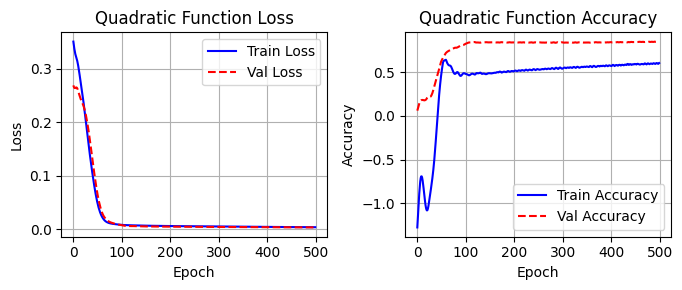

In [143]:
# plot_results(x_train_quad.numpy(), y_train_quad.numpy(), y_train_pred_quad.detach().numpy(), x_val_quad.numpy(), y_val_quad.numpy(), y_val_pred_quad.detach().numpy(), 'Quadratic Function Regression')
plot_metrics(train_losses_quad, val_losses_quad, np.array(train_accuracies_quad), np.array(val_accuracies_quad), 'Quadratic Function Loss', 'Quadratic Function Accuracy')
# plot_all_losses(train_losses_quad, val_losses_quad, np.array(train_accuracies_quad), np.array(val_accuracies_quad),title='Quadratic Function Loss')#, 'Quadratic Function Accuracy')

## Exemple 2 - Sinuidal Funcion

### Data

In [94]:
# Parameters for sine function
x_range_sine = (-2*np.pi, 2*np.pi)

num_points_sine = 100
noise_sine = 0.1  # Amount of noise_sine to add


# Data generation for sine function
x_sine, y_sine = generate_sine_data(x_range_sine, num_points_sine, noise_sine)

# Split data into train and validation sets for sine function
x_train_sine, x_val_sine, y_train_sine, y_val_sine = train_test_split(x_sine, y_sine, test_size=0.2, random_state=42)
x_train_sine, y_train_sine = to_tensor(x_train_sine, y_train_sine)
x_val_sine, y_val_sine = to_tensor(x_val_sine, y_val_sine)


### Models

In [97]:

# Model, loss, and optimizer for sine function
model_sine = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_sine.parameters(), lr=0.01)

# Training for sine function
train_losses_sine, val_losses_sine, train_accuracies_sine, val_accuracies_sine = train(model_sine, criterion, optimizer, x_train_sine, y_train_sine, x_val_sine, y_val_sine
                                                                                       , 2000)

# Testing and visualization for sine function
y_train_pred_sine = test(model_sine, x_train_sine)
y_val_pred_sine = test(model_sine, x_val_sine)

Epoch [100/2000], Train Loss: 0.0525, Val Loss: 0.0483, Train Acc: -0.1579, Val Acc: -3.0009
Epoch [200/2000], Train Loss: 0.0334, Val Loss: 0.0373, Train Acc: -0.0672, Val Acc: -2.5611
Epoch [300/2000], Train Loss: 0.0294, Val Loss: 0.0301, Train Acc: -0.0316, Val Acc: -2.2342
Epoch [400/2000], Train Loss: 0.0251, Val Loss: 0.0212, Train Acc: 0.0561, Val Acc: -1.4277
Epoch [500/2000], Train Loss: 0.0183, Val Loss: 0.0124, Train Acc: 0.2512, Val Acc: -0.2029
Epoch [600/2000], Train Loss: 0.0140, Val Loss: 0.0114, Train Acc: 0.3396, Val Acc: 0.0922
Epoch [700/2000], Train Loss: 0.0107, Val Loss: 0.0112, Train Acc: 0.4140, Val Acc: -0.2959
Epoch [800/2000], Train Loss: 0.0088, Val Loss: 0.0107, Train Acc: 0.4862, Val Acc: -0.2722
Epoch [900/2000], Train Loss: 0.0081, Val Loss: 0.0103, Train Acc: 0.5257, Val Acc: -0.0723
Epoch [1000/2000], Train Loss: 0.0078, Val Loss: 0.0107, Train Acc: 0.5411, Val Acc: 0.1014
Epoch [1100/2000], Train Loss: 0.0077, Val Loss: 0.0107, Train Acc: 0.5518, Va

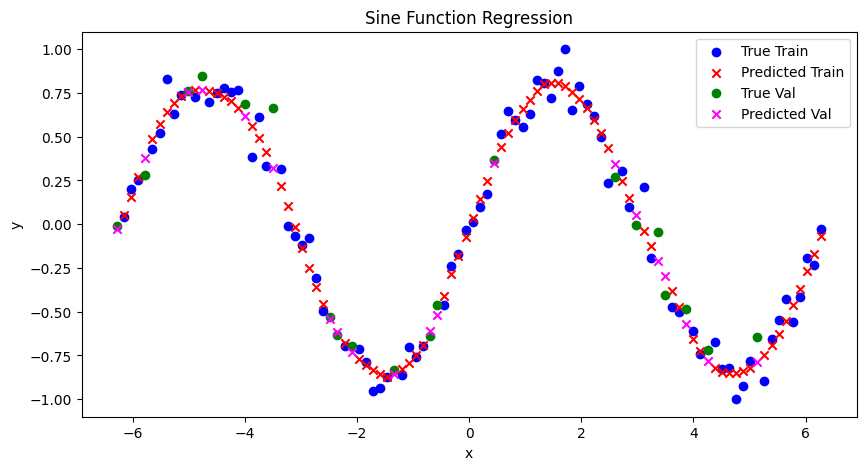

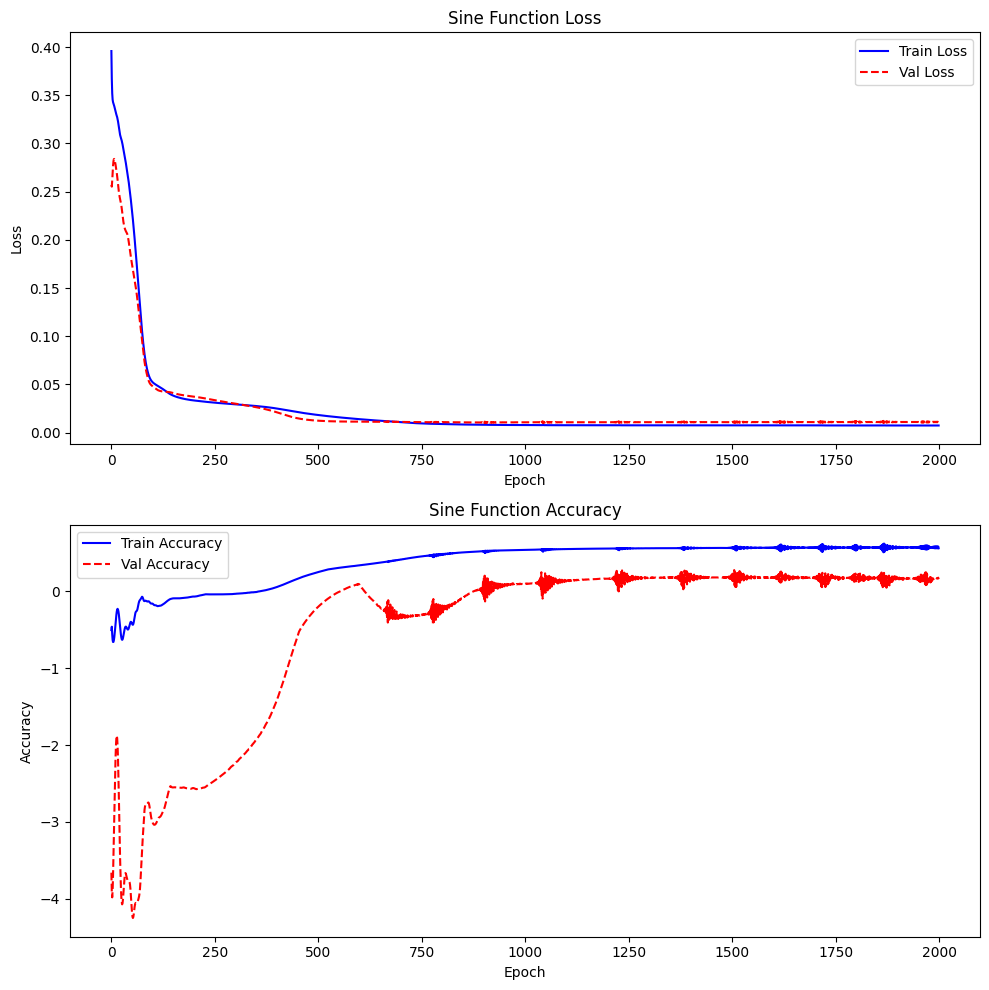

In [98]:


plot_results(x_train_sine.numpy(), y_train_sine.numpy(), y_train_pred_sine.detach().numpy(), x_val_sine.numpy(), y_val_sine.numpy(), y_val_pred_sine.detach().numpy(), 'Sine Function Regression')
plot_metrics(train_losses_sine, val_losses_sine, np.array(train_accuracies_sine), np.array(val_accuracies_sine), 'Sine Function Loss', 'Sine Function Accuracy')


In [ ]:

# 
